# NBA Notebook
2020/21 MWT Data Science

-----------------------------

## Tema
Analisi di dati statistici di cestisti della Regular Season del campionato di NBA 2021/2022.

### Dataset
 - https://www.kaggle.com/vivovinco/nba-player-stats
 
### Repository
 - https://github.com/AndreCant/MWTDataScience

### Autori
 - Andrea Cantagallo
 - Umberto La Barbera

***
## Data Manipulation<a name="datamanipulation"></a>

Processo di manipolazione dei dati. Importazione di dataset da file csv in un Data Frame. Il dataset contiene le informazioni relative ai cestisti di NBA.

_Import librerie_

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_Import dataset_

In [35]:
df = pd.read_csv("dataset.csv", sep = ';')

_Una prima vista del dataset_

In [29]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


_Dimensione del Data Frame (590, 33)_

In [34]:
df.shape

(590, 31)

#### Estrazione nuove colonne

    1) Totale tentativi di canestro per partita

In [36]:
tot_goal_attempt = df['FGA'] + df['3PA'] + df['2PA']
df.insert(30, 'TGA', tot_goal_attempt)

    2) Totale punti per minuto

In [38]:
points_by_minutes = df['PTS'] / df['MP']
df.insert(31, 'PTSM', points_by_minutes)

    3) Punti totali segnati

In [39]:
total_points = df['PTS'] * df['G']
df.insert(32, 'TPTS', total_points)

_Dataset con le nuove colonne_

In [8]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,TGA,PTSM,TPTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,7.7,1.3,0.6,0.6,1.1,2.2,7.9,16.3,0.312253,268.6
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,9.3,3.0,1.0,0.6,1.6,1.7,6.7,9.8,0.260700,294.8
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,10.0,3.2,1.2,0.5,2.9,3.1,18.7,26.6,0.568389,392.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,2.5,0.5,0.1,0.2,0.3,0.9,3.4,7.5,0.323810,85.0
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,5.7,0.9,0.4,1.1,0.8,1.7,13.8,20.6,0.597403,441.6


_Calcolo della media di punti al minuto_

In [40]:
minutes_mean = df['MP'].mean()

_Estrazione dei cestisti che hanno giocato più di 10 partite con un minutaggio superiore alla media_

In [41]:
best_players = df[['Player','Age','Tm','G','MP','PTSM', 'TPTS']]
best_players = best_players.loc[(best_players['MP'] > minutes_mean) & (best_players['G'] > 10)]

_Una vista dei migliori/peggiori cestisti in base ai punti al minuto_

In [42]:
best_players_points_minutes = best_players.sort_values(by='PTSM',ascending=False)
best_players_points_minutes

,Player,Age,Tm,G,MP,PTSM,TPTS
11,Giannis Antetokounmpo,27,MIL,39,32.7,0.874618,1115.4
156,Joel Embiid,27,PHI,34,32.9,0.863222,965.6
149,Kevin Durant,33,BRK,36,36.5,0.802740,1054.8
586,Trae Young,23,ATL,41,34.8,0.801724,1143.9
265,LeBron James,37,LAL,34,36.6,0.789617,982.6
...,...,...,...,...,...,...,...
211,Maurice Harkless,28,SAC,30,18.4,0.217391,120.0
254,Andre Iguodala,38,GSW,25,20.5,0.204878,105.0
182,Taj Gibson,36,NYK,29,19.1,0.193717,107.3
16,Trevor Ariza,36,LAL,12,19.2,0.192708,44.4


_Una vista dei migliori/peggiori cestisti in base ai punti totali_

In [44]:
best_players_points_total = best_players.sort_values(by='TPTS',ascending=False)
best_players_points_total

,Player,Age,Tm,G,MP,PTSM,TPTS
586,Trae Young,23,ATL,41,34.8,0.801724,1143.9
11,Giannis Antetokounmpo,27,MIL,39,32.7,0.874618,1115.4
122,Stephen Curry,33,GSW,42,34.7,0.757925,1104.6
513,Jayson Tatum,23,BOS,43,36.8,0.684783,1083.6
130,DeMar DeRozan,32,CHI,41,34.8,0.747126,1066.0
...,...,...,...,...,...,...,...
144,PJ Dozier,25,DEN,18,18.9,0.285714,97.2
511,Keifer Sykes,28,IND,11,22.2,0.351351,85.8
279,Stanley Johnson,25,LAL,12,20.5,0.321951,79.2
402,Nerlens Noel,27,NYK,18,23.0,0.152174,63.0


_Estrazione dei team con media dei punti al minuto_

In [46]:
best_teams = best_players_points_minutes.groupby(['Tm']).mean()
best_teams = best_teams[['PTSM']].sort_values(by=['PTSM'],ascending=False)
best_teams.rename(columns= {"PTSM" : "Points per minutes"})

,Points per minutes
Tm,
MEM,0.491776
UTA,0.488111
MIL,0.486429
ATL,0.481344
SAS,0.478731
POR,0.477954
CHO,0.475532
MIA,0.471582
PHO,0.470775


### Analisi delle Performance: UFuncs vs For Loop <a name="performance"></a>

L'analisi delle performance è effettuato tramite il calcolo dei punti al minuto

_UFuncs_

In [47]:
timeUFuncs = %timeit -o df['PTS'] / df['MP']
timeUFuncs.average

55.3 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


5.527019571427445e-05

_For Loop_

In [49]:
def forLoopFunc():
    points_by_minutes = {}
    for index, row in df.iterrows():
        points_by_minutes[index] = row['PTS'] / row['MP']
        
timeForLoop = %timeit -o forLoopFunc()
timeForLoop.average

17.6 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.017579968428572103

_Grafico comparativo delle performance_

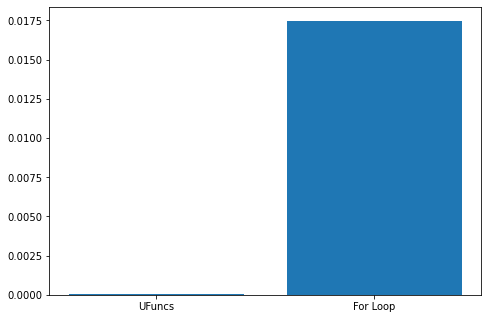

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['UFuncs','For Loop']
results = [timeUFuncs.best, timeForLoop.best]
ax.bar(methods,results)
plt.show()

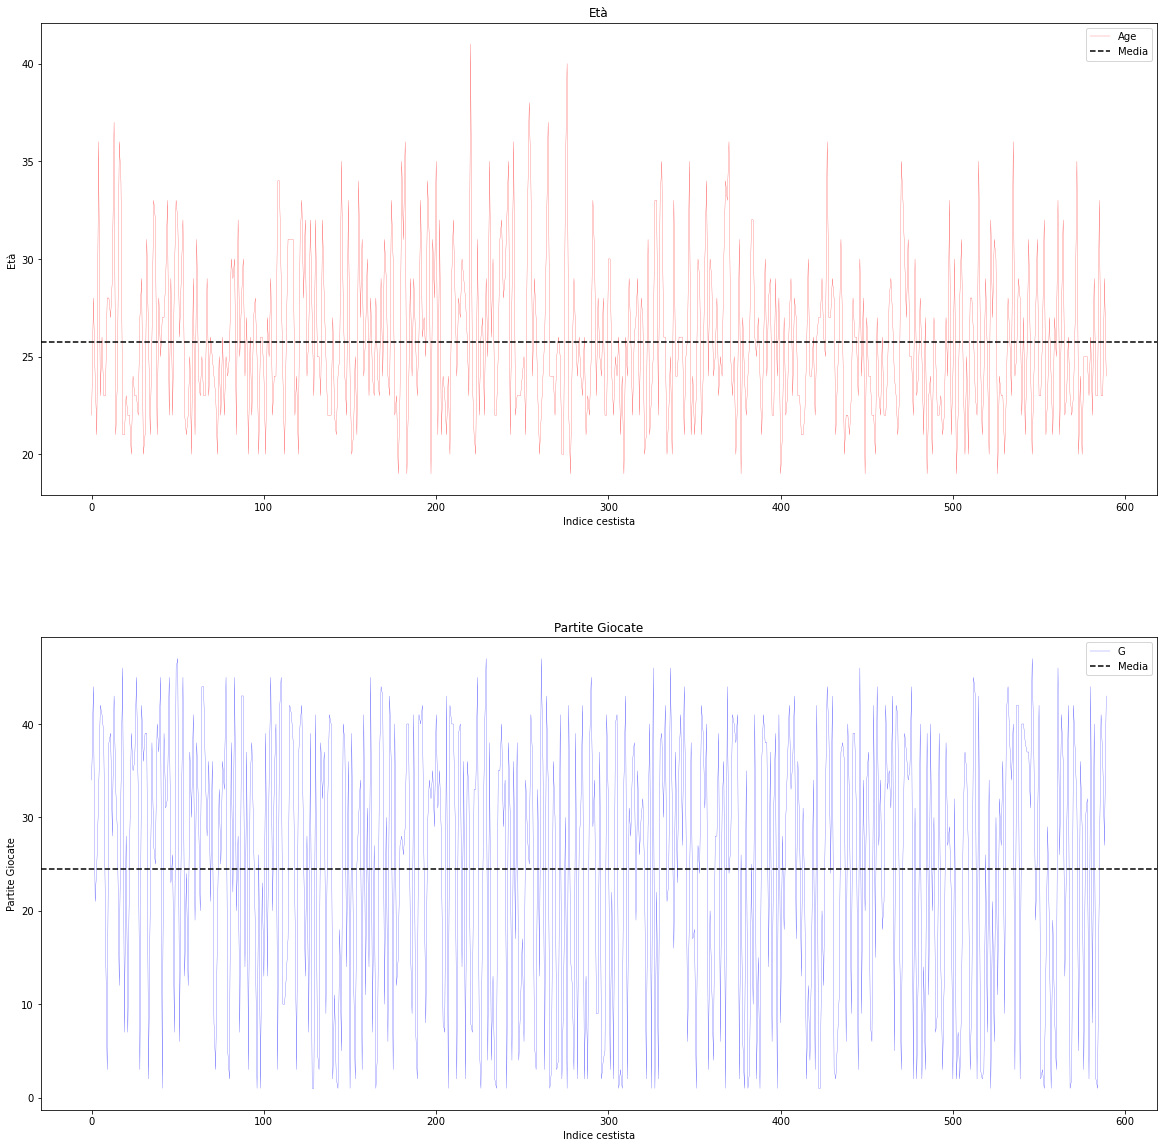

In [112]:
df_view_bar=df[df.Age.notna() & df.G.notna()]

cols = ["Age","G"]
colors = ["r","b"]
plt.figure(figsize=(20,20))

for index,col in enumerate(cols):
    plt.subplot(2,1,index+1)
    plt.plot(df_view_bar[col].to_numpy(),color = colors[index] ,linewidth =.2,label = cols[index])
    plt.axhline(df_view_bar[col].mean(), color = "black", linestyle = "dashed", label = "Media")
    plt.legend(loc= "best")
    plt.subplots_adjust(hspace = .3)
    
    plt.xlabel("Indice cestista")
    plt.ylabel("Partite Giocate" if col == "G" else "Età")
    plt.title("Partite Giocate" if col == "G" else "Età")
    
plt.show()

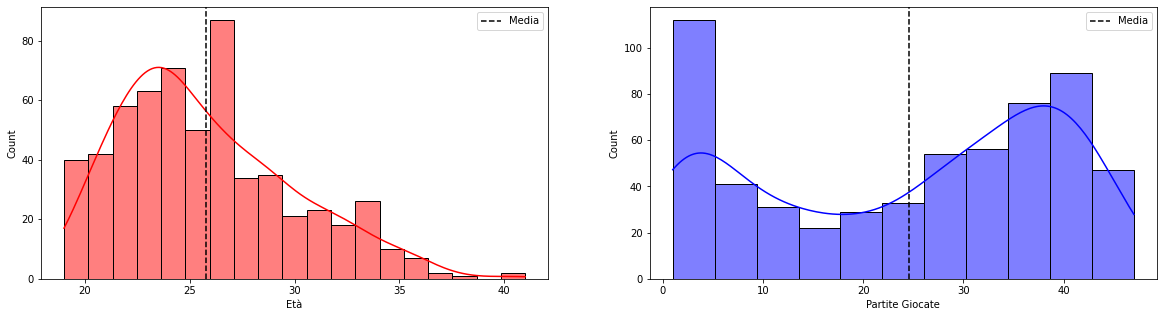

In [113]:
fig, axes = plt.subplots(1, len(cols), figsize=(20,5), squeeze=False)

for index, col in enumerate(cols):
    ax = axes[0, index]
    sns.histplot(list(df_view_bar[col]), color=colors[index], kde=True, ax=ax)
    ax.axvline(df_view_bar[col].mean(), color = "black", linestyle = "dashed", label="Media")
    ax.legend(loc="best")
    ax.set_xlabel("Partite Giocate" if col == "G" else "Età")
    
plt.show()

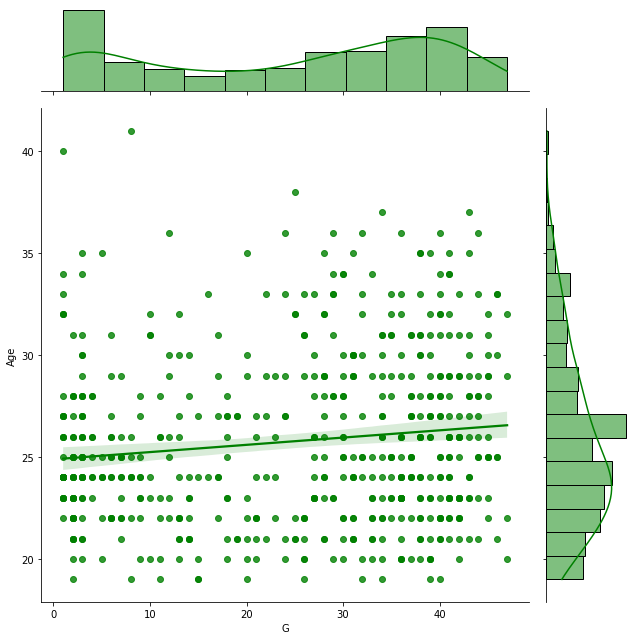

In [84]:
sns.jointplot(x=df_view_bar["G"],y=df_view_bar["Age"], kind="reg",color="g", height = 9)
plt.show()

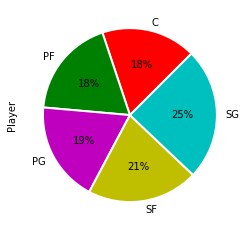

In [111]:
df_position = df.groupby('Pos').count()
df_position['Player'].plot.pie(
    autopct = "%1.0f%%",
    wedgeprops = {
        "linewidth":2,
        "edgecolor":"white"
    },
    colors = ["r", "g", "m", "y", "c"],
    startangle = 45
)
plt.show()

In [100]:
cols = ['PTS', 'AST', 'BLK', 'PF', 'TOV', 'ORB', 'DRB']

df_position = df.groupby('Pos')
df_mean_view = df_position.mean()
df_mean = df_mean_view.loc[:,cols]
    
df_mean = df_mean.rename(columns={
    'PTS':  'Punti',
    'AST':  'Assist',
    'BLK':  'Blocchi',
    'PF':  'Falli',
    'TOV':  'Turnovers',
    'ORB': 'Rimbalzi offensivi',
    'DRB': 'Rimbalzi difensivi'
})

df_mean

,Punti,Assist,Blocchi,Falli,Turnovers,Rimbalzi offensivi,Rimbalzi difensivi
Pos,,,,,,,
C,7.910577,1.199038,0.754808,1.921154,0.984615,1.705769,3.746154
PF,7.952294,1.353211,0.468807,1.678899,0.907339,1.026606,3.097248
PG,9.071818,3.344545,0.223636,1.481818,1.391818,0.426364,2.208182
SF,7.350000,1.290984,0.282787,1.458197,0.825410,0.666393,2.304098
SG,7.286897,1.574483,0.201379,1.291724,0.862069,0.429655,1.858621


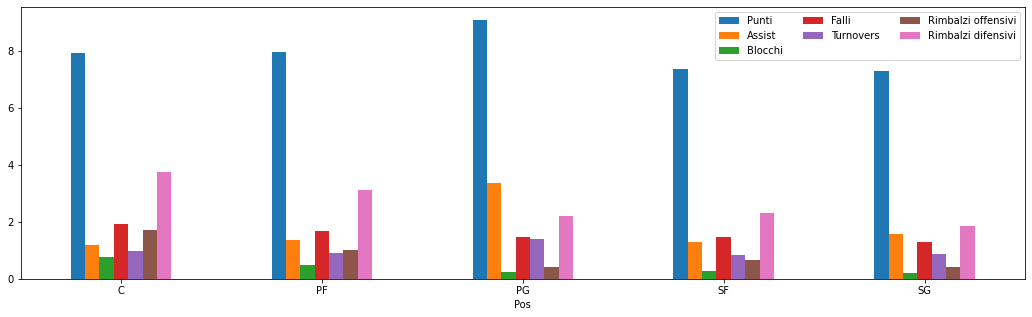

In [110]:
df_mean.plot.bar(rot=0,figsize=(18,5)).legend(ncol=3)
plt.show()

In [104]:
df4 = df.copy()
df4.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

In [105]:
df4.Pos = df4.Pos.str.replace('C', '0')
df4.Pos = df4.Pos.str.replace('PF', '1')
df4.Pos = df4.Pos.str.replace('SG', '2')
df4.Pos = df4.Pos.str.replace('PG', '3')
df4.Pos = df4.Pos.str.replace('SF', '4')

df4.Pos = df4.Pos.astype('int32')

In [106]:
df4.Tm.unique()

array(['TOR', 'MEM', 'MIA', 'BRK', 'NOP', 'MIL', 'CLE', 'IND', 'LAL',
       'ORL', 'HOU', 'WAS', 'PHO', 'UTA', 'SAC', 'CHO', 'CHI', 'ATL',
       'NYK', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN', 'DET', 'GSW',
       'POR', 'BOS', 'DAL'], dtype=object)

In [107]:
df4.Tm = df4.Tm.str.replace('TOR', '0')
df4.Tm = df4.Tm.str.replace('MEM', '1')
df4.Tm = df4.Tm.str.replace('MIA', '2')
df4.Tm = df4.Tm.str.replace('BRK', '3')
df4.Tm = df4.Tm.str.replace('NOP', '4')
df4.Tm = df4.Tm.str.replace('MIL', '5')
df4.Tm = df4.Tm.str.replace('CLE', '6')
df4.Tm = df4.Tm.str.replace('IND', '7')
df4.Tm = df4.Tm.str.replace('LAL', '8')
df4.Tm = df4.Tm.str.replace('ORL', '9')
df4.Tm = df4.Tm.str.replace('HOU', '10')
df4.Tm = df4.Tm.str.replace('WAS', '11')
df4.Tm = df4.Tm.str.replace('PHO', '12')
df4.Tm = df4.Tm.str.replace('UTA', '13')
df4.Tm = df4.Tm.str.replace('SAC', '14')
df4.Tm = df4.Tm.str.replace('CHO', '15')
df4.Tm = df4.Tm.str.replace('CHI', '16')
df4.Tm = df4.Tm.str.replace('ATL', '17')
df4.Tm = df4.Tm.str.replace('NYK', '18')
df4.Tm = df4.Tm.str.replace('DEN', '19')
df4.Tm = df4.Tm.str.replace('PHI', '20')
df4.Tm = df4.Tm.str.replace('SAS', '21')
df4.Tm = df4.Tm.str.replace('LAC', '22')
df4.Tm = df4.Tm.str.replace('OKC', '23')
df4.Tm = df4.Tm.str.replace('MIN', '24')
df4.Tm = df4.Tm.str.replace('DET', '25')
df4.Tm = df4.Tm.str.replace('GSW', '26')
df4.Tm = df4.Tm.str.replace('POR', '27')
df4.Tm = df4.Tm.str.replace('BOS', '28')
df4.Tm = df4.Tm.str.replace('DAL', '29')

df4.Tm = df4.Tm.astype('int32')

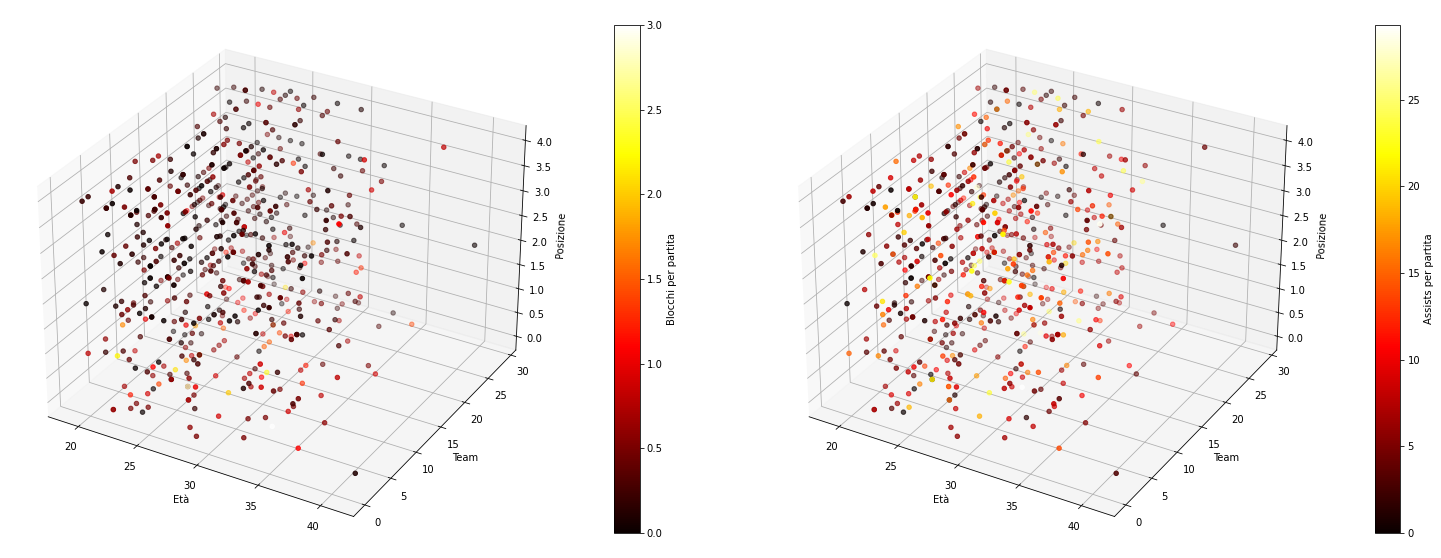

In [130]:
x = df4.Age
y = df4.Tm
z = df4.Pos
c_dim = df4.BLK
d_dim = df4.PTS 

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Età')
ax.set_ylabel('Team')
ax.set_zlabel('Posizione')
img = ax.scatter(x, y, z, c=c_dim, cmap=plt.hot())
fig.colorbar(img, fraction=0.04, pad=0.1, label='Blocchi per partita')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_xlabel('Età')
ax2.set_ylabel('Team')
ax2.set_zlabel('Posizione')
img2 = ax2.scatter(x, y, z, c=d_dim, cmap=plt.hot())
fig.colorbar(img2, fraction=0.04, pad=0.1, label='Punti per partita')

plt.show()